In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import glob
import datetime

%matplotlib inline

In [2]:
data_file = '..\\data\\raw\\cash_price_from_Perry\\corn_cash\\'
cvs_name = 'full_Alabama_Corn.csv'

df = pd.read_csv(f"{data_file}{cvs_name}")
df.head()

,RIC,Timestamp,Commodity Basis,Last Quote Close,Timestamp2,Address,lon,lat
0,CORNALFATH-C1,2018-02-13,0.0,3.67,2018-02-13,1910 Hwy 31S Athens Alabama 35611 Spot,-87.082405,34.761354
1,CORNALFATH-C1,2018-02-12,0.0,3.67,2018-02-12,1910 Hwy 31S Athens Alabama 35611 Spot,-87.082405,34.761354
2,CORNALFATH-C1,2018-02-09,0.0,3.62,2018-02-09,1910 Hwy 31S Athens Alabama 35611 Spot,-87.082405,34.761354
3,CORNALFATH-C1,2018-02-08,0.0,3.66,2018-02-08,1910 Hwy 31S Athens Alabama 35611 Spot,-87.082405,34.761354
4,CORNALFATH-C1,2018-02-07,0.0,3.65,2018-02-07,1910 Hwy 31S Athens Alabama 35611 Spot,-87.082405,34.761354


In [153]:
acre = pd.read_csv("..\\data\\raw\\acreplanted_national_corn_nass_1926-2020.csv")
acre.head()

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,County ANSI,Zip Code,Region,watershed_code,Watershed,Commodity,Domain,Domain Category,CORN - ACRES PLANTED - <b>VALUE</b>,CORN - ACRES PLANTED - <b>CV (%)</b>
0,SURVEY,2020,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CORN,TOTAL,NOT SPECIFIED,"92,006,000",NaN
1,SURVEY,2019,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CORN,TOTAL,NOT SPECIFIED,"89,700,000",NaN
2,SURVEY,2018,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CORN,TOTAL,NOT SPECIFIED,"88,871,000",NaN
3,SURVEY,2017,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CORN,TOTAL,NOT SPECIFIED,"90,167,000",NaN
4,SURVEY,2016,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CORN,TOTAL,NOT SPECIFIED,"94,004,000",NaN


In [188]:
#acre['corn_acre']=acre.iloc[:,[18]]
#acre['corn_acre'].astype(str).astype(int)
acre['corn_acre'] = acre['corn_acre'].apply(lambda n: ''.join(n.split(','))).astype(str).astype(int)

In [237]:
#acre['corn_acre'].apply(lambda n: ''.join(n.split(',')))
acre['corn_acre']

0      92006000
1      89700000
2      88871000
3      90167000
4      94004000
        ...    
90    103915000
91     99130000
92    100399000
93     98460000
94     99660000
Name: corn_acre, Length: 95, dtype: int32

Text(0, 0.5, 'corn_acre')

<Figure size 864x288 with 0 Axes>

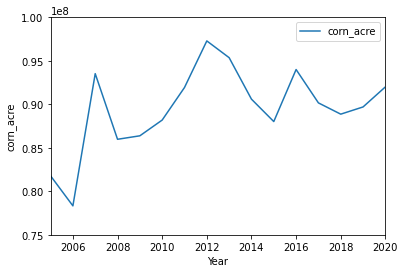

In [201]:
plt.figure(figsize=(12,4))
acre.plot.line(x='Year',y='corn_acre')
plt.xlim(2005,2020)
plt.ylim(75000000,100000000)
plt.ylabel("corn_acre")

In [45]:
data_file = '..\\data\\raw\\futureprice_corn_soy_2006-2020\\'
all_file = glob.glob(data_file + 'zcu*.csv')

li = []
#dateparse = lambda dates: pd.datetime.strptime()
for filename in all_file:
    df = pd.read_csv(filename, header = 0)
    li.append(df)
frame = pd.concat(li,axis=0,ignore_index=True)

In [61]:
frame

,Time,Open,High,Low,Last,Change,Volume,Open Int
0,09/14/2006,224.75,224.75,223.00,223.00,-1.00,0.0,0.0
1,09/13/2006,224.00,225.50,222.25,224.00,0.50,2676.0,2369.0
2,09/12/2006,228.25,228.25,223.50,223.50,-5.25,5460.0,3405.0
3,09/11/2006,232.00,232.25,225.50,228.75,-3.00,7125.0,4478.0
4,09/08/2006,231.50,233.00,230.50,231.75,1.00,7723.0,6132.0
...,...,...,...,...,...,...,...,...
6483,01/08/2020,407.50,408.25,407.50,408.25,0.00,19.0,889.0
6484,01/07/2020,407.50,408.25,407.50,408.25,0.25,5.0,872.0
6485,01/06/2020,408.00,408.00,408.00,408.00,-0.75,8.0,873.0
6486,01/03/2020,408.75,408.75,408.75,408.75,-1.75,0.0,866.0


In [35]:
frame.dtypes

Time         object
Open        float64
High        float64
Low         float64
Last        float64
Change      float64
Volume      float64
Open Int    float64
dtype: object

In [79]:
frame['timelen']=frame['Time'].apply(len)
frame.head()

,Time,Open,High,Low,Last,Change,Volume,Open Int,timelen
0,09/14/2006,224.75,224.75,223.00,223.00,-1.00,0.0,0.0,10
1,09/13/2006,224.00,225.50,222.25,224.00,0.50,2676.0,2369.0,10
2,09/12/2006,228.25,228.25,223.50,223.50,-5.25,5460.0,3405.0,10
3,09/11/2006,232.00,232.25,225.50,228.75,-3.00,7125.0,4478.0,10
4,09/08/2006,231.50,233.00,230.50,231.75,1.00,7723.0,6132.0,10


In [81]:
frame = frame[frame.timelen==10]

In [82]:
frame['year']=frame['Time'].apply(lambda n: n.split('/')[2])

<ipython-input-82-b432a467275c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['year']=frame['Time'].apply(lambda n: n.split('/')[2])


In [83]:
frame['year']=frame['Time'].apply(lambda n: n.split('/')[2])
frame['month']=frame['Time'].apply(lambda n: n.split('/')[0])
#frame['day']=frame['Time'].apply(lambda n: n.split('/')[1])
frame['year']=pd.to_numeric(frame['year'])
frame['month']=pd.to_numeric(frame['month'])
#frame['day']=pd.to_numeric(frame['day'])
frame.head()

<ipython-input-83-d77f4bedaab0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['year']=frame['Time'].apply(lambda n: n.split('/')[2])
<ipython-input-83-d77f4bedaab0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['month']=frame['Time'].apply(lambda n: n.split('/')[0])
<ipython-input-83-d77f4bedaab0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

,Time,Open,High,Low,Last,Change,Volume,Open Int,timelen,year,month
0,09/14/2006,224.75,224.75,223.00,223.00,-1.00,0.0,0.0,10,2006,9
1,09/13/2006,224.00,225.50,222.25,224.00,0.50,2676.0,2369.0,10,2006,9
2,09/12/2006,228.25,228.25,223.50,223.50,-5.25,5460.0,3405.0,10,2006,9
3,09/11/2006,232.00,232.25,225.50,228.75,-3.00,7125.0,4478.0,10,2006,9
4,09/08/2006,231.50,233.00,230.50,231.75,1.00,7723.0,6132.0,10,2006,9


In [93]:
frame['TS'] =(frame['year']-2006)+(frame['month']-1)/12
frame.head()

<ipython-input-93-689a4469cd6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['TS'] =(frame['year']-2006)+(frame['month']-1)/12


,Time,Open,High,Low,Last,Change,Volume,Open Int,timelen,year,month,TS
0,09/14/2006,224.75,224.75,223.00,223.00,-1.00,0.0,0.0,10,2006,9,0.666667
1,09/13/2006,224.00,225.50,222.25,224.00,0.50,2676.0,2369.0,10,2006,9,0.666667
2,09/12/2006,228.25,228.25,223.50,223.50,-5.25,5460.0,3405.0,10,2006,9,0.666667
3,09/11/2006,232.00,232.25,225.50,228.75,-3.00,7125.0,4478.0,10,2006,9,0.666667
4,09/08/2006,231.50,233.00,230.50,231.75,1.00,7723.0,6132.0,10,2006,9,0.666667


In [102]:
frames = frame[['Open','year','month']]
frames.head()

,Open,year,month
0,224.75,2006,9
1,224.00,2006,9
2,228.25,2006,9
3,232.00,2006,9
4,231.50,2006,9


In [104]:
framet=frames.pivot_table(values ='Open', columns=['month'], index=['year'])
framet

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2005,247.162500,245.513158,247.420455,245.095238,243.011905,251.818182,257.087500,249.521739,241.309524,237.559524,231.488095,233.083333
2006,248.537500,256.263158,257.777174,270.453947,278.869318,272.562500,274.012500,257.891304,266.189655,319.136364,358.940476,369.000000
2007,383.068750,402.861842,404.818182,382.568750,382.130682,399.410714,356.357143,358.353261,375.526786,398.945652,420.809524,447.375000
2008,503.404762,536.862500,557.267857,599.772727,614.821429,706.583333,666.062500,582.047619,574.225000,467.206522,425.947368,398.909091
2009,438.137500,409.296053,414.153409,422.815476,441.225000,438.250000,352.937500,350.422619,346.983333,405.420455,426.550000,427.943182
2010,423.296053,403.789474,403.043478,390.190476,393.987500,377.409091,395.547619,423.852273,472.466667,526.107143,545.357143,557.284091
2011,571.600000,603.203947,604.945652,658.862500,659.892857,677.409091,656.775000,697.543478,687.016667,613.892857,602.035714,580.773810
2012,580.718750,576.450000,573.517045,551.937500,533.210227,552.392857,704.238095,742.032609,709.705357,660.804348,648.011905,643.800000
2013,594.648810,575.236842,567.806250,550.977273,558.090909,571.437500,527.017045,491.517045,491.017241,473.369565,454.475000,451.238095


In [106]:
framet.columns

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='month')

### Following the same path as Sales data, relocate "Sep-Dec" to Market year 

In [109]:
#Market year from Sep-De --> shift
framet[9]=framet[9].shift(1)
framet[10]=framet[10].shift(1)
framet[11]=framet[11].shift(1)
framet[12]=framet[12].shift(1)
framet

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2005,247.162500,245.513158,247.420455,245.095238,243.011905,251.818182,257.087500,249.521739,NaN,NaN,NaN,NaN
2006,248.537500,256.263158,257.777174,270.453947,278.869318,272.562500,274.012500,257.891304,241.309524,237.559524,231.488095,233.083333
2007,383.068750,402.861842,404.818182,382.568750,382.130682,399.410714,356.357143,358.353261,266.189655,319.136364,358.940476,369.000000
2008,503.404762,536.862500,557.267857,599.772727,614.821429,706.583333,666.062500,582.047619,375.526786,398.945652,420.809524,447.375000
2009,438.137500,409.296053,414.153409,422.815476,441.225000,438.250000,352.937500,350.422619,574.225000,467.206522,425.947368,398.909091
2010,423.296053,403.789474,403.043478,390.190476,393.987500,377.409091,395.547619,423.852273,346.983333,405.420455,426.550000,427.943182
2011,571.600000,603.203947,604.945652,658.862500,659.892857,677.409091,656.775000,697.543478,472.466667,526.107143,545.357143,557.284091
2012,580.718750,576.450000,573.517045,551.937500,533.210227,552.392857,704.238095,742.032609,687.016667,613.892857,602.035714,580.773810
2013,594.648810,575.236842,567.806250,550.977273,558.090909,571.437500,527.017045,491.517045,709.705357,660.804348,648.011905,643.800000


In [134]:
#framet.rename({'1':"Jan_p"}) #,2:'Feb_p',3:'Mar_p',4:'Apr_p',5:'May_p',6:'June_p',7:'July_p',8:'Aug_p',9:'Sept_p',10:'Oct_p',11:'Nov_p',12:'Dec_p'
#framet[9].name
framet.to_csv('futureprice_corn_2006-2020.csv')

In [235]:
framet['acre']=acre['corn_acre']

In [236]:
framet.head()

month,1,2,3,4,5,6,7,8,9,10,11,12,acre
year,,,,,,,,,,,,,
2005,247.162500,245.513158,247.420455,245.095238,243.011905,251.818182,257.087500,249.521739,NaN,NaN,NaN,NaN,NaN
2006,248.537500,256.263158,257.777174,270.453947,278.869318,272.562500,274.012500,257.891304,241.309524,237.559524,231.488095,233.083333,NaN
2007,383.068750,402.861842,404.818182,382.568750,382.130682,399.410714,356.357143,358.353261,266.189655,319.136364,358.940476,369.000000,NaN
2008,503.404762,536.862500,557.267857,599.772727,614.821429,706.583333,666.062500,582.047619,375.526786,398.945652,420.809524,447.375000,NaN
2009,438.137500,409.296053,414.153409,422.815476,441.225000,438.250000,352.937500,350.422619,574.225000,467.206522,425.947368,398.909091,NaN


### Open V.S. Time

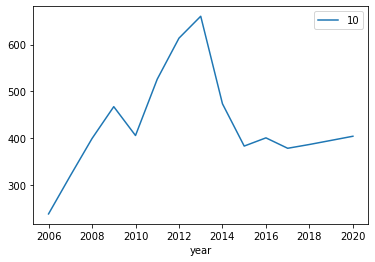

In [225]:
#plt.figure(figsize=(12,4))
framet.plot.line(y=10)
#framet.index.values

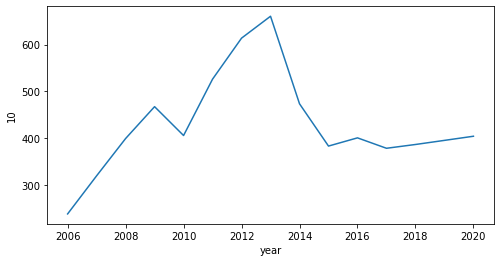

In [232]:
plt.figure(figsize=(8,4))
sns.lineplot(x=framet.index, y=10,data=framet) 

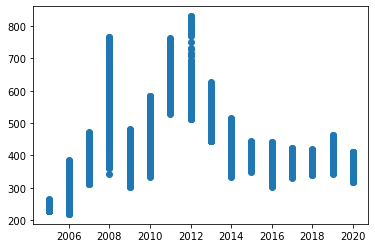

In [200]:
plt.scatter('year','Open',data=frame)

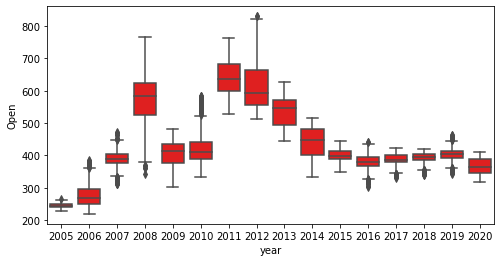

In [152]:
#plt.scatter('TS','Open',data=frame)
#sns.boxplot(x='TS',y='Open',data=frame) 
plt.figure(figsize=(8,4))
sns.boxplot(x='year',y='Open',data=frame, color='red') 

### Volume v.s. Month

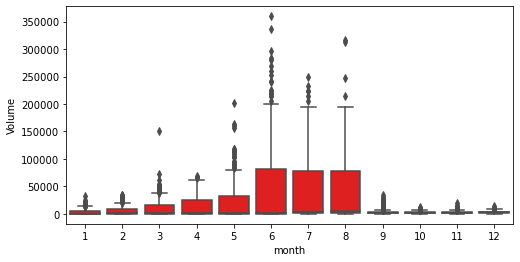

In [146]:
plt.figure(figsize=(8,4))
sns.boxplot(x='month',y='Volume',data=frame, color='red') 

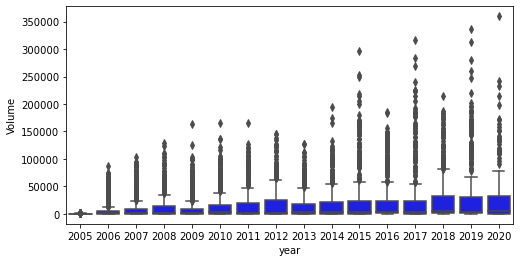

In [145]:
plt.figure(figsize=(8,4))
sns.boxplot('year','Volume',data=frame, color='blue')

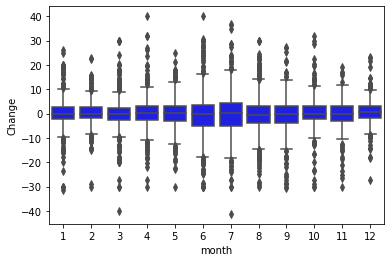

In [148]:
sns.boxplot('month','Change',data=frame, color='blue')

In [86]:
by_yr = frame.groupby('year')


In [89]:
ysd = by_yr.std()['Open']
ym = by_yr.mean()['Open']